In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Binary logistic regression

#### Zadanie 1)

In [23]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

# Theta vector
theta = np.zeros((X.shape[0]+1, 1))

# Add row withs value '1' of top of the matrix
X = np.concatenate([np.ones([1, X.shape[1]]), X])

# Normalization
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

#### Zadanie 2)

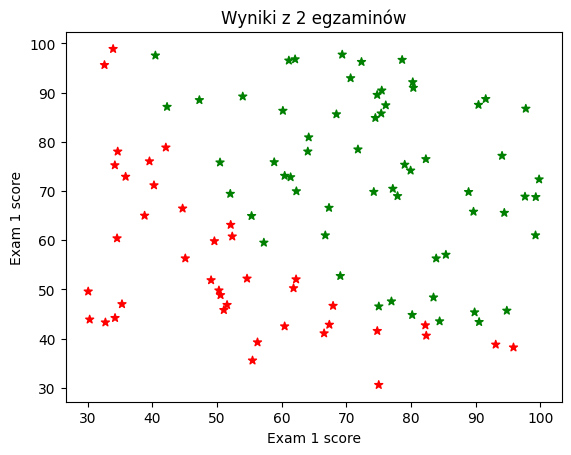

In [24]:
my_color = np.where(data['Admitted'] == 1, 'green', 'red')

plt.scatter(data['Exam 1'], data['Exam 2'], color=my_color, marker='*')
plt.title('Wyniki z 2 egzaminów')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 1 score')
plt.show()

#### Zadanie 3)

In [25]:
def sig(t):
    return 1/(1 + np.exp(-1*t))

#### Zadanie 4)

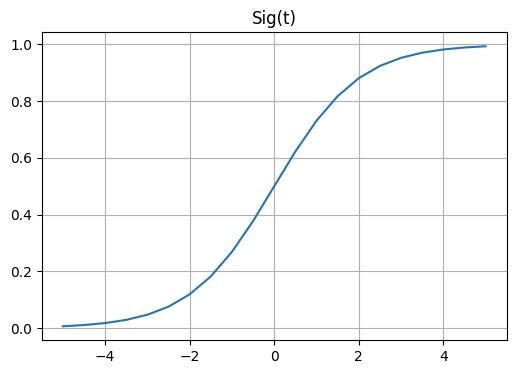

In [26]:
x = np.arange(-5, 5.5, 0.5)

plt.figure(figsize=(6, 4))
plt.plot(x, sig(x))
plt.title('Sig(t)')
plt.grid()
plt.show()

#### Zadanie 5)

In [27]:
def cost(theta, X, y):
    m = len(X[0])
    hx = sig(theta.T @ X)

    return 1/m * np.sum(-y*np.log(hx) - (1-y)*np.log(1-hx))

theta = np.zeros((X.shape[0], 1))

print(cost(theta, X, y))

0.6931471805599453


#### Zadanie 6)

In [28]:
def simple_gradient(X, y, theta, alpha, n):
    m = len(X[0])

    for _ in range(n):
        for j in range(theta.shape[0]):
            theta[j] -= (alpha/m) * np.sum((sig(theta.T @ X)-y)*X[j, :])

    return theta

theta = simple_gradient(X, y, theta, 1, 150)
print(theta)

[[1.42929788]
 [3.38040725]
 [3.13521188]]


#### Zadanie 7)

In [29]:
# ToDo

#### Zadanie 8)

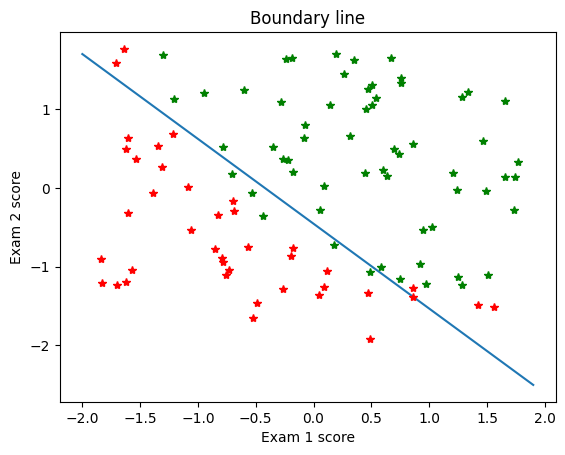

In [30]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, '*', color='green')
plt.plot(X1_0, X2_0, '*', color='red')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Boundary line')
plt.show()

### Logistic regression - python

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

#### Zadanie 1)

In [32]:
logreg = LogisticRegression(penalty='l2', solver='liblinear')
logreg.fit(X, Y)

LogisticRegression(solver='liblinear')

#### Zadanie 2)

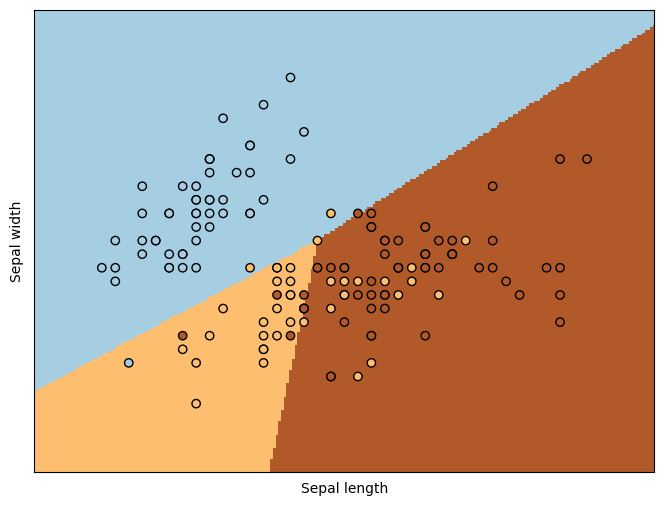

In [33]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

#### Zadanie 3)

In [34]:
predictions = logreg.predict_proba(X)

for i in range(predictions.shape[1]):
    actual_col_probability = np.sum(predictions[:, i])/len(Y)
    print(f'{iris.target_names[i]}: {actual_col_probability}')

setosa: 0.31701932700529556
versicolor: 0.3299011632036994
virginica: 0.3530795097910051


#### Zadanie 4)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(Y, logreg.predict(X)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.81      0.42      0.55        50
           2       0.62      0.90      0.74        50

    accuracy                           0.77       150
   macro avg       0.79      0.77      0.75       150
weighted avg       0.79      0.77      0.75       150



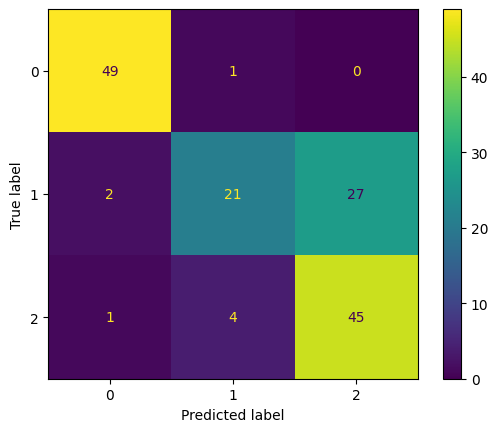

In [36]:
cm = confusion_matrix(Y, logreg.predict(X))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()